# **Kmart Sales EDA**



<div>
<img src="https://dox4euoyzny9u.cloudfront.net/images/blog/uploads/dataprocessinggdpr.jpg" width="600"/>
</div>

**Giriş**

Kmart, ABD'de önde gelen bir e-ticaret sitesidir ve yıllık satış inceleme toplantısının bir parçası olarak, 2019'daki satış verilerinden elde edilen bilgilere dayanarak 2020 yılı satış stratejisine karar vermeleri gerekir. Bu bağlamda Kmart 2019 satış verileri için keşifsel veri analizi gerçekleştirilmiştir.

##**1.** Veri setinin işlenebilir hale getirilmesi

In [3]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip /content/Kmart_sales_data.zip

In [5]:
df_list = []
path = "/content/Kmart_sales_data"

for roots, dirs, files in os.walk(path):               
    if files:
        all_path = [roots + os.sep + file for file in  files]
        all_path = sorted(all_path, key=lambda m: datetime.strptime(m.split(os.sep)[-1].split('_')[1], "%B"))
        for data_path in all_path:
            df = pd.read_csv(data_path)
            df["month"] = data_path.split(os.sep)[-1].split('_')[1] 
            df_list.append(df)
            

sales_data = pd.concat(df_list)
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December


In [6]:
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month'],
      dtype='object')

In [7]:
sales_data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
count,186305,186305,186305,186305,186305,186305,186850
unique,178438,20,10,24,142396,140788,12
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,December
freq,355,21903,168552,21903,355,355,25117


##**2.** Veri setinin 'nan' değerlerden kurtulması

In [8]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month                 0
dtype: int64

In [9]:
sales_data = sales_data.dropna()

In [10]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
month               0
dtype: int64

##**3.** Veri setinin analizi

###**3.1** En iyi satış yapılan ay

In [17]:
sales_data = sales_data[sales_data['Product'] != 'Product']
sales_data['Price Each'] = sales_data['Price Each'].astype('float')
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('float') 

In [18]:
per_month = sales_data.groupby(['month'])['Price Each'].sum().sort_values(ascending=False)
per_month = per_month.to_frame()
per_month['month'] = per_month.index
per_month

,Price Each,month
month,,
December,4.594119e+06,December
October,3.715703e+06,October
April,3.373059e+06,April
November,3.179905e+06,November
May,3.127097e+06,May
March,2.793172e+06,March
July,2.631687e+06,July
June,2.562497e+06,June
August,2.230297e+06,August


In [23]:
per_month['Price Each'].max()

4594118.950001606

Görüldüğü üzere en çok satış yapılan ay Aralık ayıdır. Yılbaşı arifesinin satışları arttırdığı görülebilir. Reklamların yılbaşı için arttırılması bu rakamları daha da çok yükseltebilir.

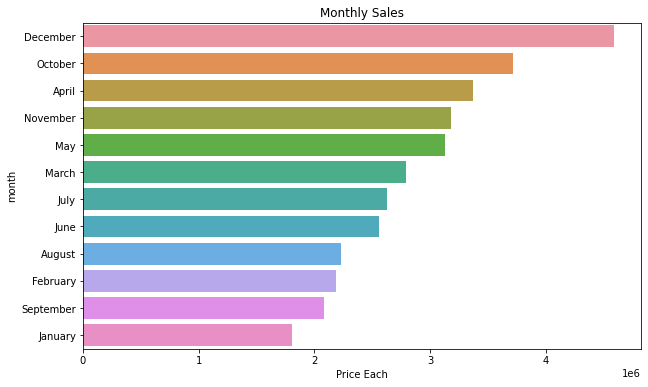

In [24]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'Price Each', y = 'month', data = per_month)
plt.title('Monthly Sales')
plt.show()

###**3.2** En çok satın alım yapan şehir

In [25]:
list_city = []
for address in sales_data['Purchase Address']:
    list_city.append(str(address).split(',')[1])
sales_data['City'] = list_city
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January,Austin
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December,San Francisco
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December,Los Angeles
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December,Seattle
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December,Dallas


In [28]:
per_city = sales_data.groupby(['City'])['Price Each'].sum().sort_values(ascending=False)
per_city = per_city.to_frame()
per_city['City'] = per_city.index
per_city

,Price Each,City
City,,
San Francisco,8.211462e+06,San Francisco
Los Angeles,5.421435e+06,Los Angeles
New York City,4.635371e+06,New York City
Boston,3.637410e+06,Boston
Atlanta,2.779908e+06,Atlanta
Dallas,2.752628e+06,Dallas
Seattle,2.733296e+06,Seattle
Portland,2.307747e+06,Portland
Austin,1.809874e+06,Austin


In [29]:
per_city['Price Each'].max()

8211461.74000411

Görüldüğü gibi San Francisco açık ara en çok satım alım yapan şehirdir. Silikon Vadisininde bulunduğu Kaliforniya eyaletinin bir parçası olması teknolojiye ilgilerini gösteriyor.

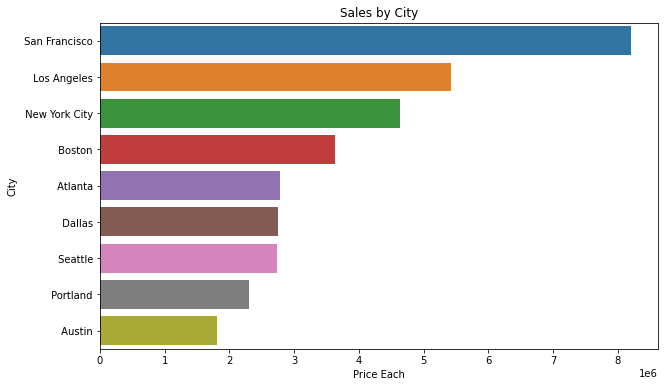

In [30]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'Price Each', y = 'City', data = per_city)
plt.title('Sales by City')
plt.show()

###**3.3** Müşterilerin ürünleri satın alma olasılığını en üst düzeye çıkarmak için görüntülü reklamcılık da en uygun zaman dilimine karar verilmesi

In [31]:
list_time = []
for time in sales_data['Order Date']:
    list_time.append(str(time).split(' ')[1])
sales_data['Time'] = list_time
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,Time
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January,Boston,21:25
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January,Portland,14:15
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January,San Francisco,13:33
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January,Los Angeles,20:33
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January,Austin,11:59
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December,San Francisco,20:58
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December,Los Angeles,12:01
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December,Seattle,06:43
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December,Dallas,10:39


In [32]:
per_time = sales_data.groupby(['Time'])['Price Each'].sum().sort_values(ascending=False)
per_time = per_time.to_frame()
per_time['Time'] = per_time.index
per_time

,Price Each,Time
Time,,
19:01,54358.35,19:01
19:16,53902.99,19:16
12:21,53717.10,12:21
20:13,52846.58,20:13
19:20,52691.86,19:20
...,...,...
02:50,374.31,02:50
03:57,308.66,03:57
04:05,277.72,04:05


Bu saatlerde toplam satış maksimumdur. Bu nedenle 19.00 ve 12.00 aralarında görüntülü reklamcılık yapılabilir.

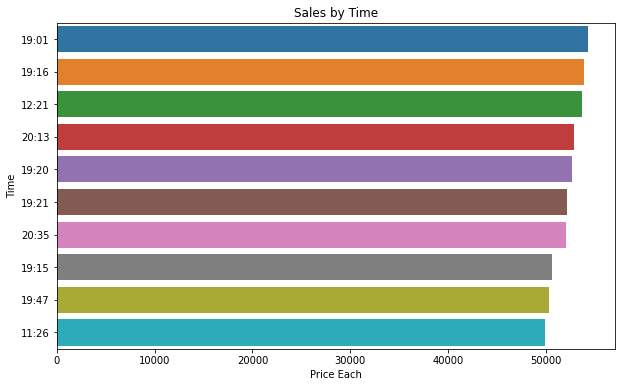

In [35]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'Price Each', y = 'Time', data = per_time.head(10))
plt.title('Sales by Time')
plt.show()

###**3.4** En çok satılan ürünler

In [41]:
sales_data['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [42]:
per_product = sales_data.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False)
per_product = per_product.to_frame()
per_product['Product'] = per_product.index
per_product

,Quantity Ordered,Product
Product,,
AAA Batteries (4-pack),31017.0,AAA Batteries (4-pack)
AA Batteries (4-pack),27635.0,AA Batteries (4-pack)
USB-C Charging Cable,23975.0,USB-C Charging Cable
Lightning Charging Cable,23217.0,Lightning Charging Cable
Wired Headphones,20557.0,Wired Headphones
Apple Airpods Headphones,15661.0,Apple Airpods Headphones
Bose SoundSport Headphones,13457.0,Bose SoundSport Headphones
27in FHD Monitor,7550.0,27in FHD Monitor
iPhone,6849.0,iPhone


1 yılda 31017 tane AAA Batteries (4-pack) satılmıştır. En çok satılan üründür. Bunun nedeni bulunan en ucuz ürün olmasıdır. 

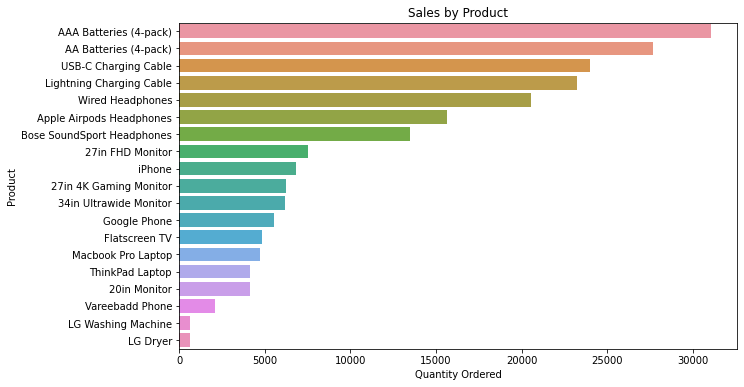

In [44]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'Quantity Ordered', y = 'Product', data = per_product)
plt.title('Sales by Product')
plt.show()